Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


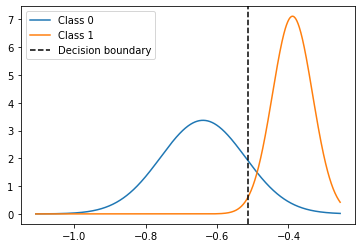

Accuracy: 0.6408450704225352
Precision: 0.91
Recall: 0.0
Threshold (-0.51403680336085+0j)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ML Assignment/DataSetforAssignment1.csv'
data= pd.read_csv(path)

# Separate features and target
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values
y = np.where(y == "M", -1, 1)

# Split into train and test sets
np.random.seed(42)
indices = np.random.permutation(len(X))
X_train = X[indices[:-int(len(X)*0.25)]]
X_test = X[indices[-int(len(X)*0.25):]]
y_train = y[indices[:-int(len(y)*0.25)]]
y_test = y[indices[-int(len(y)*0.25):]]

# Compute class means and variances
mean_0 = np.mean(X_train[y_train == -1], axis=0)
mean_1 = np.mean(X_train[y_train == 1], axis=0)
var_0 = np.var(X_train[y_train == -1], axis=0)
var_1 = np.var(X_train[y_train == 1], axis=0)

# Compute within-class covariance matrix
S_w = np.diag(var_0 + var_1)

# Compute between-class covariance matrix
S_b = np.outer(mean_1 - mean_0, mean_1 - mean_0)

# Compute eigenvectors and eigenvalues of S_w^-1 * S_b
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_w) @ S_b)

# Sort eigenvectors by decreasing eigenvalues
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Project data onto the first eigenvector
X_train_proj = X_train @ eig_vecs[:, 0]
X_test_proj = X_test @ eig_vecs[:, 0]

# Compute means and variances of projected data
mean_0_proj = np.mean(X_train_proj[y_train == -1])
mean_1_proj = np.mean(X_train_proj[y_train == 1])
var_0_proj = np.var(X_train_proj[y_train == -1])
var_1_proj = np.var(X_train_proj[y_train == 1])

# Compute decision threshold
threshold = (mean_0_proj + mean_1_proj) / 2
# a = (1 / var_1_proj) - (1 / var_0_proj)
# b = 2 * (mean_1_proj/var_1_proj - mean_0_proj/var_0_proj)
# c = (((mean_0_proj ** 2)/var_0_proj - (mean_1_proj ** 2)/var_1_proj) + np.log(var_0_proj/var_1_proj))
# roots = np.roots([a, b, c])
# threshold= roots[1]

# Compute class conditional densities
x = np.linspace(X_train_proj.min(), X_train_proj.max(), 1000)
p_0 = 1 / np.sqrt(2 * np.pi * var_0_proj) * np.exp(-0.5 * (x - mean_0_proj)**2 / var_0_proj)
p_1 = 1 / np.sqrt(2 * np.pi * var_1_proj) * np.exp(-0.5 * (x - mean_1_proj)**2 / var_1_proj)

# Compute intersection point
a = -(mean_1_proj - mean_0_proj) / (var_0_proj + var_1_proj)

# Compute model predictions
y_pred = np.zeros_like(y_test)
y_pred[X_test_proj > threshold] = 1
# Plot class conditional densities and decision boundary
plt.plot(x, p_0, label="Class 0")
plt.plot(x, p_1, label="Class 1")
plt.axvline(x=threshold, color="black", linestyle="--", label="Decision boundary")
plt.legend()
plt.show()
# Compute accuracy, precision, and recall
accuracy = np.mean(y_pred == y_test)
precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == -1) & (y_test == -1)) / np.sum(y_test == -1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Threshold',threshold)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


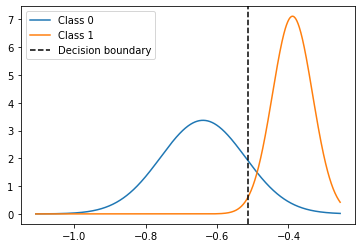

Accuracy: 0.6408450704225352
Precision: 0.91
Recall: 0.0
Threshold (-0.5140368033608502+0j)


In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ML Assignment/DataSetforAssignment1.csv'
data= pd.read_csv(path)



# Get column names
col_names = list(data.columns)

# Shuffle columns except the 2nd column
cols = col_names[2:]
np.random.shuffle(cols)
cols = ['diagnosis'] + cols

# Reorder columns
data = data[cols]

# Separate features and labels
X = data.iloc[:, 1:].to_numpy()
y = np.where(data.iloc[:, 0] == 'M', -1, 1)
# # Separate features and target
# X = data.iloc[:, 2:].values
# y = data.iloc[:, 1].values
# y = np.where(y == "M", -1, 1)


# Split into train and test sets
np.random.seed(42)
indices = np.random.permutation(len(X))
X_train = X[indices[:-int(len(X)*0.25)]]
X_test = X[indices[-int(len(X)*0.25):]]
y_train = y[indices[:-int(len(y)*0.25)]]
y_test = y[indices[-int(len(y)*0.25):]]

# Compute class means and variances
mean_0 = np.mean(X_train[y_train == -1], axis=0)
mean_1 = np.mean(X_train[y_train == 1], axis=0)
var_0 = np.var(X_train[y_train == -1], axis=0)
var_1 = np.var(X_train[y_train == 1], axis=0)

# Compute within-class covariance matrix
S_w = np.diag(var_0 + var_1)

# Compute between-class covariance matrix
S_b = np.outer(mean_1 - mean_0, mean_1 - mean_0)

# Compute eigenvectors and eigenvalues of S_w^-1 * S_b
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_w) @ S_b)

# Sort eigenvectors by decreasing eigenvalues
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Project data onto the first eigenvector
X_train_proj = X_train @ eig_vecs[:, 0]
X_test_proj = X_test @ eig_vecs[:, 0]

# Compute means and variances of projected data
mean_0_proj = np.mean(X_train_proj[y_train == -1])
mean_1_proj = np.mean(X_train_proj[y_train == 1])
var_0_proj = np.var(X_train_proj[y_train == -1])
var_1_proj = np.var(X_train_proj[y_train == 1])

# Compute decision threshold
threshold = (mean_0_proj + mean_1_proj) / 2

# Compute class conditional densities
x = np.linspace(X_train_proj.min(), X_train_proj.max(), 1000)
p_0 = 1 / np.sqrt(2 * np.pi * var_0_proj) * np.exp(-0.5 * (x - mean_0_proj)**2 / var_0_proj)
p_1 = 1 / np.sqrt(2 * np.pi * var_1_proj) * np.exp(-0.5 * (x - mean_1_proj)**2 / var_1_proj)

# Compute intersection point
a = -(mean_1_proj - mean_0_proj) / (var_0_proj + var_1_proj)

# Compute model predictions
y_pred = np.zeros_like(y_test)
y_pred[X_test_proj > threshold] = 1


# Plot class conditional densities and decision boundary
plt.plot(x, p_0, label="Class 0")
plt.plot(x, p_1, label="Class 1")
plt.axvline(x=threshold, color="black", linestyle="--", label="Decision boundary")
plt.legend()
plt.show()

# Compute accuracy, precision, and recall
accuracy = np.mean(y_pred == y_test)
precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == -1) & (y_test == -1)) / np.sum(y_test == -1)


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Threshold',threshold)

In [ ]:
s_f=0.67 #splitting factor(ratio between training data and test)
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])